In [1]:
from keras import preprocessing
from keras.utils.vis_utils import plot_model

In [2]:
import keras
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import shutil
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from keras.layers import MaxPooling2D
import pandas as pd
from keras.preprocessing.image import load_img
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf

In [3]:
import pydot

In [4]:
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

C:\Users\bayui\Anaconda3\lib\site-packages\keras\backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [5]:
#untuk mengetahui direktori sekarang
os.getcwd( )

'C:\\Users\\bayui'

In [6]:
#ubah ke direktori E
os.chdir('E:') 

In [7]:
#lihat direktori sekarang
os.getcwd( )

'E:\\'

In [8]:
finalPath = 'E:/all data/'

In [9]:
categoriesData = os.listdir(finalPath)
categoriesData

['asd', 'avsd', 'normal', 'vsd']

In [10]:
def load_images_and_labels(categoriesData):
    imagelist=[]
    labellist=[]
    for index, category in enumerate(categoriesData):
        for image_name in os.listdir(finalPath+"/"+category):
            img = cv2.imread(finalPath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            resized_img = img_array.resize((227, 227))
            
            imagelist.append(np.array(resized_img))
            
            labellist.append(index)
    return imagelist, labellist

imagesFinal, labelFinal = load_images_and_labels(categoriesData)
print("No. of images loaded = ",len(imagesFinal),"\nNo. of labels loaded = ",len(labelFinal))
print(type(imagesFinal),type(labelFinal))

No. of images loaded =  8265 
No. of labels loaded =  8265
<class 'list'> <class 'list'>


In [11]:
imagesFinal = np.array(imagesFinal)
labelFinal = np.array(labelFinal)

print("Images shape = ",imagesFinal.shape,"\nLabels shape = ",labelFinal.shape)
print(type(imagesFinal),type(labelFinal))

Images shape =  (8265, 227, 227, 3) 
Labels shape =  (8265,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


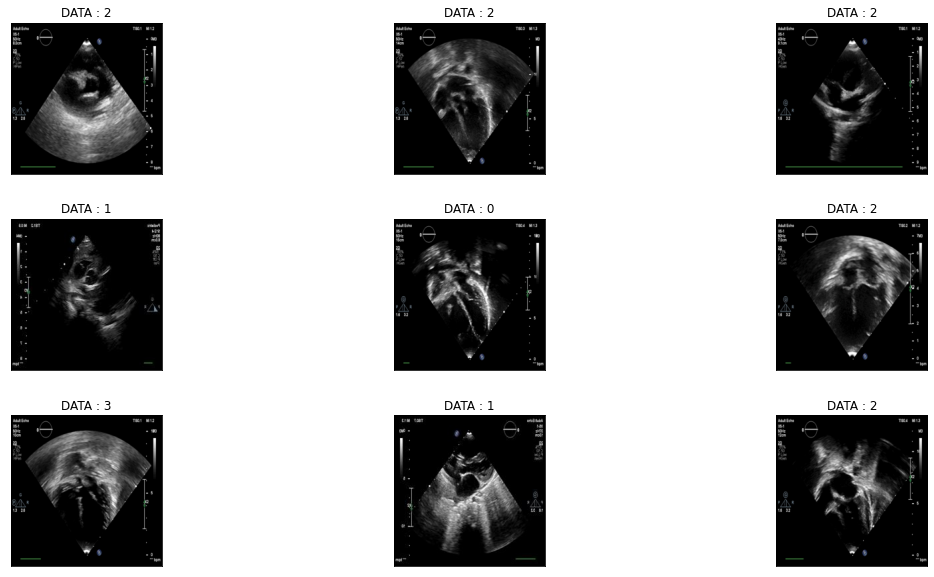

In [12]:
def display_rand_images(imagesFinal, labelFinal):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , imagesFinal.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(imagesFinal[r[0]])
        
        plt.title('DATA : {}'.format(labelFinal[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(imagesFinal, labelFinal)

In [13]:
random_seed = 42

n = np.arange(imagesFinal.shape[0])
print("'n' values before shuffling = ",n)

np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 8262 8263 8264]

'n' values after shuffling =  [7727 7311  856 ... 5390  860 7270]


In [14]:
imagesFinal = imagesFinal[n]
labelFinal = labelFinal[n]

print("Images shape after shuffling = ",imagesFinal.shape,"\nLabels shape after shuffling = ",labelFinal.shape)

Images shape after shuffling =  (8265, 227, 227, 3) 
Labels shape after shuffling =  (8265,)


In [15]:
imagesFinal = imagesFinal.astype(np.float32)
labelFinal = labelFinal.astype(np.int32)
imagesFinal = imagesFinal/255
print("Images shape after normalization = ",imagesFinal.shape)

Images shape after normalization =  (8265, 227, 227, 3)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(imagesFinal, labelFinal, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (6612, 227, 227, 3)
y_train shape =  (6612,)

x_test shape =  (1653, 227, 227, 3)
y_test shape =  (1653,)


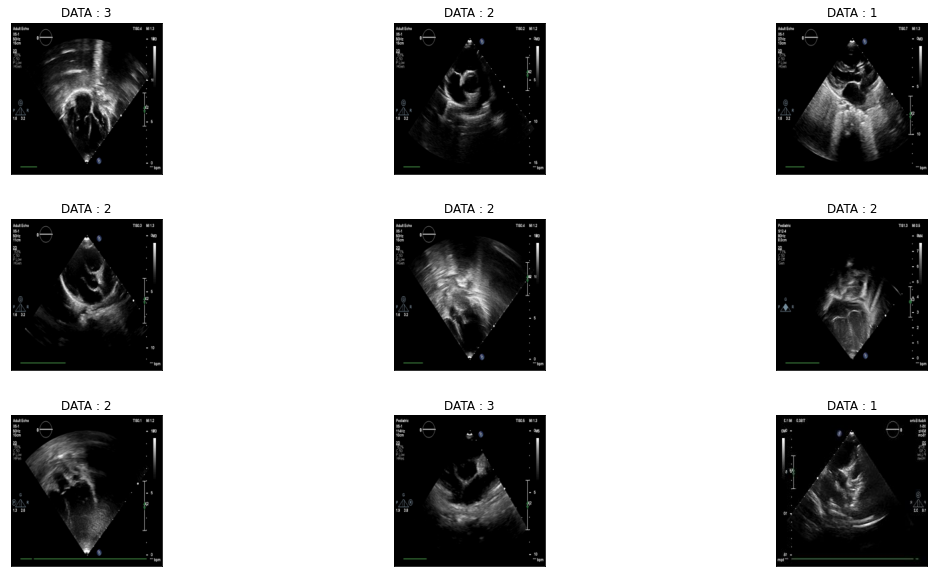

In [17]:
def display_rand_images(x_train, y_train):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , x_train.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(x_train[r[0]])
        
        plt.title('DATA : {}'.format(y_train[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(x_train, y_train)

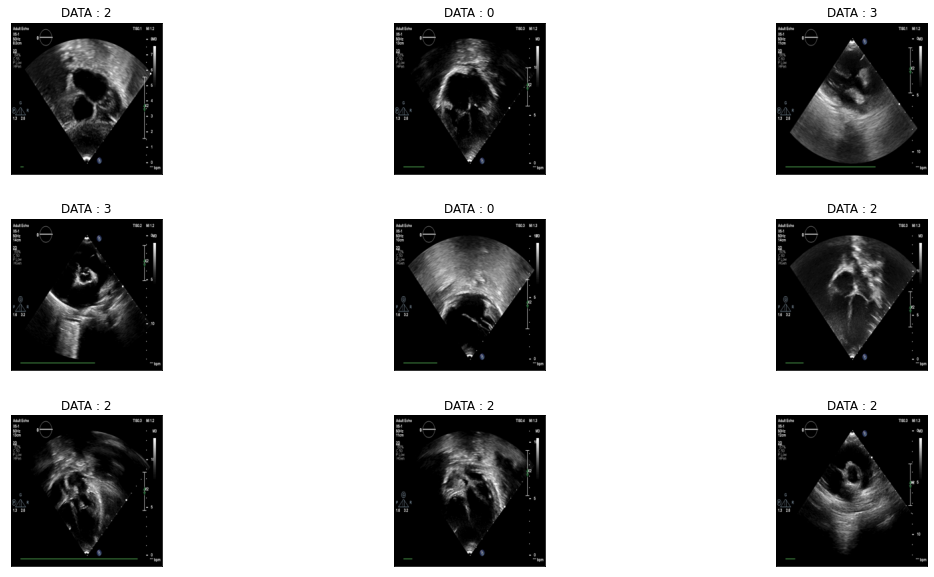

In [18]:
def display_rand_images(x_test, y_test):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , x_test.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(x_test[r[0]])
        
        plt.title('DATA : {}'.format(y_test[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(x_test, y_test)

In [19]:
def identity_block(X, f, filters, stage, block):
   
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # Second component of main path 
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = layers.add(inputs=[X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

In [20]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # Second component of main path 
    X = Conv2D(F2, (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    
    # Third component of main path 
    X = Conv2D(F3, (1, 1), strides = (1,1), padding = 'same', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '1', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = layers.add(inputs=[X, X_shortcut])
    X = Activation('relu')(X)
    
    return X


In [22]:
def ResNet50(input_shape = (227, 227, 3), classes = 4):
   
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    # Stage 3 
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL
    X = AveragePooling2D(pool_size=(2, 2), name = 'avg_pool')(X)

        # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [23]:
resnet50 = ResNet50(input_shape = (227, 227, 3), classes = 4)

In [24]:
resnet50.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 233, 233, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 114, 114, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                           

                                                                                                  
 activation_8 (Activation)      (None, 56, 56, 64)   0           ['bn2c_branch2b[0][0]']          
                                                                                                  
 res2c_branch2c (Conv2D)        (None, 56, 56, 256)  16640       ['activation_8[0][0]']           
                                                                                                  
 bn2c_branch2c (BatchNormalizat  (None, 56, 56, 256)  1024       ['res2c_branch2c[0][0]']         
 ion)                                                                                             
                                                                                                  
 add_2 (Add)                    (None, 56, 56, 256)  0           ['bn2c_branch2c[0][0]',          
                                                                  'activation_6[0][0]']           
          

 ion)                                                                                             
                                                                                                  
 add_5 (Add)                    (None, 28, 28, 512)  0           ['bn3c_branch2c[0][0]',          
                                                                  'activation_15[0][0]']          
                                                                                                  
 activation_18 (Activation)     (None, 28, 28, 512)  0           ['add_5[0][0]']                  
                                                                                                  
 res3d_branch2a (Conv2D)        (None, 28, 28, 128)  65664       ['activation_18[0][0]']          
                                                                                                  
 bn3d_branch2a (BatchNormalizat  (None, 28, 28, 128)  512        ['res3d_branch2a[0][0]']         
 ion)     

 add_8 (Add)                    (None, 14, 14, 1024  0           ['bn4b_branch2c[0][0]',          
                                )                                 'activation_24[0][0]']          
                                                                                                  
 activation_27 (Activation)     (None, 14, 14, 1024  0           ['add_8[0][0]']                  
                                )                                                                 
                                                                                                  
 res4c_branch2a (Conv2D)        (None, 14, 14, 256)  262400      ['activation_27[0][0]']          
                                                                                                  
 bn4c_branch2a (BatchNormalizat  (None, 14, 14, 256)  1024       ['res4c_branch2a[0][0]']         
 ion)                                                                                             
          

                                                                                                  
 res4f_branch2a (Conv2D)        (None, 14, 14, 256)  262400      ['activation_36[0][0]']          
                                                                                                  
 bn4f_branch2a (BatchNormalizat  (None, 14, 14, 256)  1024       ['res4f_branch2a[0][0]']         
 ion)                                                                                             
                                                                                                  
 activation_37 (Activation)     (None, 14, 14, 256)  0           ['bn4f_branch2a[0][0]']          
                                                                                                  
 res4f_branch2b (Conv2D)        (None, 14, 14, 256)  590080      ['activation_37[0][0]']          
                                                                                                  
 bn4f_bran

 ion)                                                                                             
                                                                                                  
 activation_46 (Activation)     (None, 7, 7, 512)    0           ['bn5c_branch2a[0][0]']          
                                                                                                  
 res5c_branch2b (Conv2D)        (None, 7, 7, 512)    2359808     ['activation_46[0][0]']          
                                                                                                  
 bn5c_branch2b (BatchNormalizat  (None, 7, 7, 512)   2048        ['res5c_branch2b[0][0]']         
 ion)                                                                                             
                                                                                                  
 activation_47 (Activation)     (None, 7, 7, 512)    0           ['bn5c_branch2b[0][0]']          
          

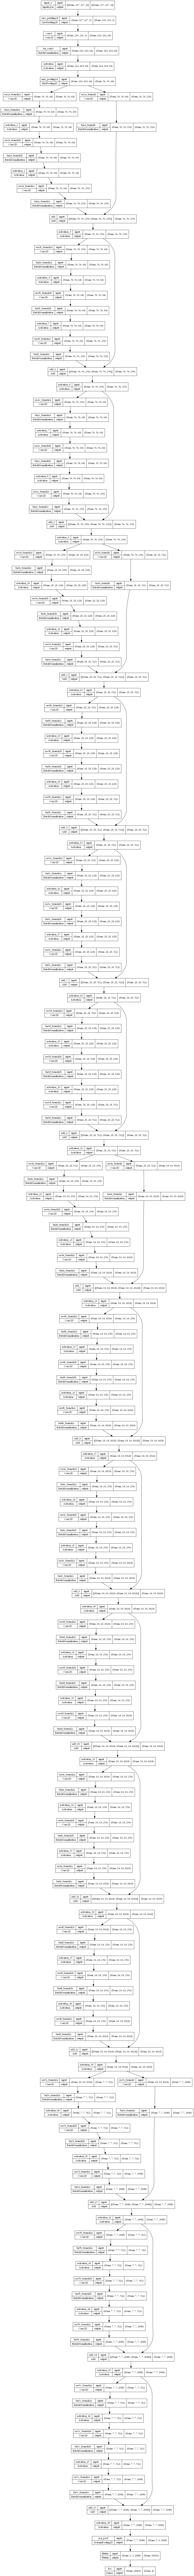

In [25]:
plot_model(resnet50, to_file='resnet50.png', show_shapes=True, show_layer_names=True)

In [24]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

C:\Users\bayui\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [28]:
resnet50.compile(optimizer = optimizer , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [25]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [27]:
epochs = 50
batch_size = 16

In [26]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=False,  
        vertical_flip=False)  

datagen.fit(x_train)

In [32]:
history = resnet50.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),
                              epochs = epochs, validation_data = (x_test, y_test),
                              verbose = 2, steps_per_epoch = 100,
                              callbacks = [learning_rate_reduction])

<ipython-input-32-2a8c35617e72>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet50.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),


Epoch 1/50
100/100 - 553s - loss: 2.6933 - accuracy: 0.4062 - val_loss: 1.6260 - val_accuracy: 0.1143 - lr: 0.0010 - 553s/epoch - 6s/step
Epoch 2/50
100/100 - 576s - loss: 1.1282 - accuracy: 0.5188 - val_loss: 1.8793 - val_accuracy: 0.4319 - lr: 0.0010 - 576s/epoch - 6s/step
Epoch 3/50
100/100 - 559s - loss: 1.1058 - accuracy: 0.4950 - val_loss: 2.0990 - val_accuracy: 0.3243 - lr: 0.0010 - 559s/epoch - 6s/step
Epoch 4/50
100/100 - 555s - loss: 1.0398 - accuracy: 0.5281 - val_loss: 2.1983 - val_accuracy: 0.3811 - lr: 0.0010 - 555s/epoch - 6s/step
Epoch 5/50

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
100/100 - 551s - loss: 0.9976 - accuracy: 0.5668 - val_loss: 1.8905 - val_accuracy: 0.2027 - lr: 0.0010 - 551s/epoch - 6s/step
Epoch 6/50
100/100 - 566s - loss: 0.9292 - accuracy: 0.5919 - val_loss: 1.3622 - val_accuracy: 0.4924 - lr: 5.0000e-04 - 566s/epoch - 6s/step
Epoch 7/50
100/100 - 551s - loss: 0.8639 - accuracy: 0.6171 - val_loss: 0.8566 - val_accura

In [33]:
resnet50.save("resnetresult.h5")
print("Saved model to disk")

Saved model to disk


In [34]:
y_test = np.array(y_test)

In [35]:
print(y_test)

[2 2 3 ... 2 3 3]


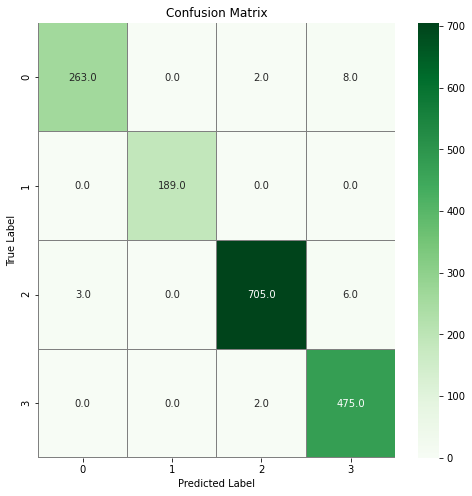

In [36]:
Y_pred = resnet50.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

confusion_mtx = confusion_matrix(y_test, Y_pred_classes)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt = '.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [37]:
from sklearn.metrics import classification_report

In [38]:
target_names = ['ASD', 'AVSD', 'NORMAL', 'VSD']
print(classification_report(y_test, Y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

         ASD       0.99      0.96      0.98       273
        AVSD       1.00      1.00      1.00       189
      NORMAL       0.99      0.99      0.99       714
         VSD       0.97      1.00      0.98       477

    accuracy                           0.99      1653
   macro avg       0.99      0.99      0.99      1653
weighted avg       0.99      0.99      0.99      1653



In [39]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in [0,1,2,3]:
    prec,recall,_,_ = precision_recall_fscore_support(np.array(y_test)==l,
                                                      np.array(Y_pred_classes)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])

In [40]:
pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

class  sensitivity  specificity
0      0     0.997826     0.963370
1      1     1.000000     1.000000
2      2     0.995740     0.987395
3      3     0.988095     0.995807

In [21]:
from keras.models import Model
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dropout
from keras.layers import Activation, BatchNormalization, Add, Reshape, DepthwiseConv2D
from keras.utils.vis_utils import plot_model

from keras import backend as K


def _make_divisible(v, divisor, min_value=None):
    if min_value is None:
        min_value = divisor
    new_v = max(min_value, int(v + divisor / 2) // divisor * divisor)
    # Make sure that round down does not go down by more than 10%.
    if new_v < 0.9 * v:
        new_v += divisor
    return new_v


def relu6(x):

    return K.relu(x, max_value=6.0)


def _conv_block(inputs, filters, kernel, strides):

    channel_axis = 1 if K.image_data_format() == 'channels_first' else -1

    x = Conv2D(filters, kernel, padding='same', strides=strides)(inputs)
    x = BatchNormalization(axis=channel_axis)(x)
    return Activation(relu6)(x)


def _bottleneck(inputs, filters, kernel, t, alpha, s, r=False):


    channel_axis = 1 if K.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = K.int_shape(inputs)[channel_axis] * t
    # Width
    cchannel = int(filters * alpha)

    x = _conv_block(inputs, tchannel, (1, 1), (1, 1))

    x = DepthwiseConv2D(kernel, strides=(s, s), depth_multiplier=1, padding='same')(x)
    x = BatchNormalization(axis=channel_axis)(x)
    x = Activation(relu6)(x)

    x = Conv2D(cchannel, (1, 1), strides=(1, 1), padding='same')(x)
    x = BatchNormalization(axis=channel_axis)(x)

    if r:
        x = Add()([x, inputs])

    return x


def _inverted_residual_block(inputs, filters, kernel, t, alpha, strides, n):

    x = _bottleneck(inputs, filters, kernel, t, alpha, strides)

    for i in range(1, n):
        x = _bottleneck(x, filters, kernel, t, alpha, 1, True)

    return x


def MobileNetv2(input_shape, k, alpha=1.0):
  
    inputs = Input(shape=input_shape)

    first_filters = _make_divisible(32 * alpha, 8)
    x = _conv_block(inputs, first_filters, (3, 3), strides=(2, 2))

    x = _inverted_residual_block(x, 16, (3, 3), t=1, alpha=alpha, strides=1, n=1)
    x = _inverted_residual_block(x, 24, (3, 3), t=6, alpha=alpha, strides=2, n=2)
    x = _inverted_residual_block(x, 32, (3, 3), t=6, alpha=alpha, strides=2, n=3)
    x = _inverted_residual_block(x, 64, (3, 3), t=6, alpha=alpha, strides=2, n=4)
    x = _inverted_residual_block(x, 96, (3, 3), t=6, alpha=alpha, strides=1, n=3)
    x = _inverted_residual_block(x, 160, (3, 3), t=6, alpha=alpha, strides=2, n=3)
    x = _inverted_residual_block(x, 320, (3, 3), t=6, alpha=alpha, strides=1, n=1)

    if alpha > 1.0:
        last_filters = _make_divisible(1280 * alpha, 8)
    else:
        last_filters = 1280

    x = _conv_block(x, last_filters, (1, 1), strides=(1, 1))
    x = GlobalAveragePooling2D()(x)
    x = Reshape((1, 1, last_filters))(x)
    x = Dropout(0.3, name='Dropout')(x)
    x = Conv2D(k, (1, 1), padding='same')(x)

    x = Activation('softmax', name='softmax')(x)
    output = Reshape((k,))(x)

    model = Model(inputs, output)
    # plot_model(model, to_file='images/MobileNetv2.png', show_shapes=True)

    return model

In [22]:
 mobilenet = MobileNetv2((227, 227, 3), 4, 1.0)

In [23]:
mobilenet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 114, 114, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 114, 114, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

                                                                                                  
 conv2d_7 (Conv2D)              (None, 57, 57, 144)  3600        ['add[0][0]']                    
                                                                                                  
 batch_normalization_10 (BatchN  (None, 57, 57, 144)  576        ['conv2d_7[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 activation_7 (Activation)      (None, 57, 57, 144)  0           ['batch_normalization_10[0][0]'] 
                                                                                                  
 depthwise_conv2d_3 (DepthwiseC  (None, 29, 29, 144)  1440       ['activation_7[0][0]']           
 onv2D)                                                                                           
          

                                                                                                  
 batch_normalization_21 (BatchN  (None, 15, 15, 64)  256         ['conv2d_14[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_15 (Conv2D)             (None, 15, 15, 384)  24960       ['batch_normalization_21[0][0]'] 
                                                                                                  
 batch_normalization_22 (BatchN  (None, 15, 15, 384)  1536       ['conv2d_15[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_15 (Activation)     (None, 15, 15, 384)  0           ['batch_normalization_22[0][0]'] 
          

 batch_normalization_32 (BatchN  (None, 15, 15, 384)  1536       ['depthwise_conv2d_10[0][0]']    
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 15, 15, 384)  0           ['batch_normalization_32[0][0]'] 
                                                                                                  
 conv2d_22 (Conv2D)             (None, 15, 15, 96)   36960       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_33 (BatchN  (None, 15, 15, 96)  384         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_23

 depthwise_conv2d_14 (Depthwise  (None, 8, 8, 960)   9600        ['activation_29[0][0]']          
 Conv2D)                                                                                          
                                                                                                  
 batch_normalization_44 (BatchN  (None, 8, 8, 960)   3840        ['depthwise_conv2d_14[0][0]']    
 ormalization)                                                                                    
                                                                                                  
 activation_30 (Activation)     (None, 8, 8, 960)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_30 (Conv2D)             (None, 8, 8, 160)    153760      ['activation_30[0][0]']          
                                                                                                  
 batch_nor

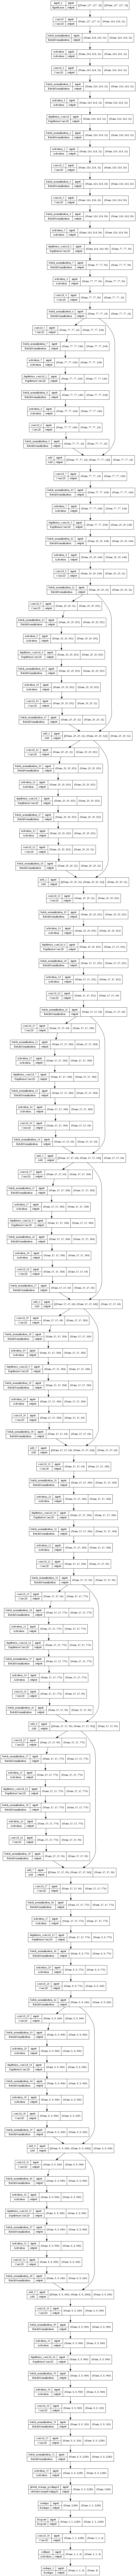

In [24]:
plot_model(mobilenet, to_file='mobilenet.png', show_shapes=True, show_layer_names=True)

In [30]:
mobilenet.compile(optimizer = optimizer , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [31]:
history = mobilenet.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),
                              epochs = epochs, validation_data = (x_test, y_test),
                              verbose = 2, steps_per_epoch = 100,
                              callbacks = [learning_rate_reduction])

<ipython-input-31-8e8f491d12ec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = mobilenet.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),


Epoch 1/50
100/100 - 198s - loss: 1.2782 - accuracy: 0.4406 - val_loss: 1.3391 - val_accuracy: 0.4319 - lr: 0.0010 - 198s/epoch - 2s/step
Epoch 2/50
100/100 - 196s - loss: 1.1449 - accuracy: 0.4805 - val_loss: 1.3243 - val_accuracy: 0.4319 - lr: 0.0010 - 196s/epoch - 2s/step
Epoch 3/50
100/100 - 194s - loss: 1.0738 - accuracy: 0.5487 - val_loss: 1.6010 - val_accuracy: 0.2886 - lr: 0.0010 - 194s/epoch - 2s/step
Epoch 4/50

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
100/100 - 193s - loss: 1.0793 - accuracy: 0.5214 - val_loss: 2.1936 - val_accuracy: 0.1143 - lr: 0.0010 - 193s/epoch - 2s/step
Epoch 5/50
100/100 - 197s - loss: 1.0103 - accuracy: 0.5406 - val_loss: 3.5292 - val_accuracy: 0.1143 - lr: 5.0000e-04 - 197s/epoch - 2s/step
Epoch 6/50
100/100 - 197s - loss: 0.9563 - accuracy: 0.5762 - val_loss: 4.4386 - val_accuracy: 0.1143 - lr: 5.0000e-04 - 197s/epoch - 2s/step
Epoch 7/50

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

In [32]:
mobilenet.save("mobilenetresult.h5")
print("Saved model to disk")

Saved model to disk


In [33]:
y_test = np.array(y_test)

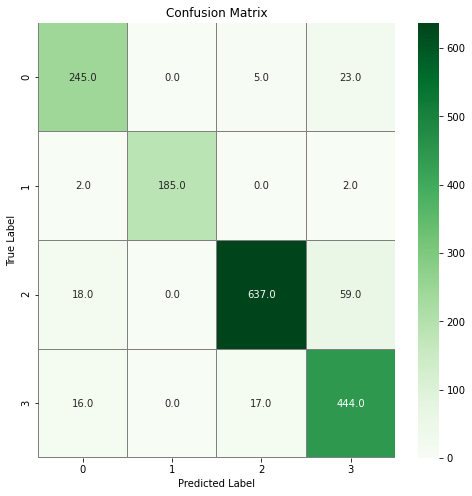

In [34]:
Y_pred = mobilenet.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

confusion_mtx = confusion_matrix(y_test, Y_pred_classes)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt = '.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [35]:
from sklearn.metrics import classification_report

In [36]:
target_names = ['ASD', 'AVSD', 'NORMAL', 'VSD']
print(classification_report(y_test, Y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

         ASD       0.87      0.90      0.88       273
        AVSD       1.00      0.98      0.99       189
      NORMAL       0.97      0.89      0.93       714
         VSD       0.84      0.93      0.88       477

    accuracy                           0.91      1653
   macro avg       0.92      0.92      0.92      1653
weighted avg       0.92      0.91      0.91      1653



In [37]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in [0,1,2,3]:
    prec,recall,_,_ = precision_recall_fscore_support(np.array(y_test)==l,
                                                      np.array(Y_pred_classes)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])

In [38]:
pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

class  sensitivity  specificity
0      0     0.973913     0.897436
1      1     1.000000     0.978836
2      2     0.976571     0.892157
3      3     0.928571     0.930818

In [25]:
from keras import applications

In [26]:
from keras.applications import xception

In [27]:
from __future__ import print_function
from __future__ import absolute_import

import warnings
import numpy as np

from keras.preprocessing import image
from keras import applications
from keras.models import Model
from keras import layers
from keras.layers import Dense
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import SeparableConv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions


TF_WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.4/xception_weights_tf_dim_ordering_tf_kernels.h5'
TF_WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.4/xception_weights_tf_dim_ordering_tf_kernels_notop.h5'


def Xception(include_top=True, weights='imagenet',
             input_tensor=None, input_shape=None,
             pooling=None,
             classes=1000):
   
    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as imagenet with `include_top`'
                         ' as true, `classes` should be 1000')

    if K.backend() != 'tensorflow':
        raise RuntimeError('The Xception model is only available with '
                           'the TensorFlow backend.')
    if K.image_data_format() != 'channels_last':
        warnings.warn('The Xception model is only available for the '
                      'input data format "channels_last" '
                      '(width, height, channels). '
                      'However your settings specify the default '
                      'data format "channels_first" (channels, width, height). '
                      'You should set `image_data_format="channels_last"` in your Keras '
                      'config located at ~/.keras/keras.json. '
                      'The model being returned right now will expect inputs '
                      'to follow the "channels_last" data format.')
        K.set_image_data_format('channels_last')
        old_data_format = 'channels_first'
    else:
        old_data_format = None

    # Determine proper input shape
    input_shape = (227,227,3)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    x = Conv2D(32, (3, 3), strides=(2, 2), use_bias=False, name='block1_conv1')(img_input)
    x = BatchNormalization(name='block1_conv1_bn')(x)
    x = Activation('relu', name='block1_conv1_act')(x)
    x = Conv2D(64, (3, 3), use_bias=False, name='block1_conv2')(x)
    x = BatchNormalization(name='block1_conv2_bn')(x)
    x = Activation('relu', name='block1_conv2_act')(x)

    residual = Conv2D(128, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False, name='block2_sepconv1')(x)
    x = BatchNormalization(name='block2_sepconv1_bn')(x)
    x = Activation('relu', name='block2_sepconv2_act')(x)
    x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False, name='block2_sepconv2')(x)
    x = BatchNormalization(name='block2_sepconv2_bn')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block2_pool')(x)
    x = layers.add([x, residual])

    residual = Conv2D(256, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = Activation('relu', name='block3_sepconv1_act')(x)
    x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False, name='block3_sepconv1')(x)
    x = BatchNormalization(name='block3_sepconv1_bn')(x)
    x = Activation('relu', name='block3_sepconv2_act')(x)
    x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False, name='block3_sepconv2')(x)
    x = BatchNormalization(name='block3_sepconv2_bn')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block3_pool')(x)
    x = layers.add([x, residual])

    residual = Conv2D(728, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = Activation('relu', name='block4_sepconv1_act')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name='block4_sepconv1')(x)
    x = BatchNormalization(name='block4_sepconv1_bn')(x)
    x = Activation('relu', name='block4_sepconv2_act')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name='block4_sepconv2')(x)
    x = BatchNormalization(name='block4_sepconv2_bn')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block4_pool')(x)
    x = layers.add([x, residual])

    for i in range(8):
        residual = x
        prefix = 'block' + str(i + 5)

        x = Activation('relu', name=prefix + '_sepconv1_act')(x)
        x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name=prefix + '_sepconv1')(x)
        x = BatchNormalization(name=prefix + '_sepconv1_bn')(x)
        x = Activation('relu', name=prefix + '_sepconv2_act')(x)
        x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name=prefix + '_sepconv2')(x)
        x = BatchNormalization(name=prefix + '_sepconv2_bn')(x)
        x = Activation('relu', name=prefix + '_sepconv3_act')(x)
        x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name=prefix + '_sepconv3')(x)
        x = BatchNormalization(name=prefix + '_sepconv3_bn')(x)

        x = layers.add([x, residual])

    residual = Conv2D(1024, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = Activation('relu', name='block13_sepconv1_act')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name='block13_sepconv1')(x)
    x = BatchNormalization(name='block13_sepconv1_bn')(x)
    x = Activation('relu', name='block13_sepconv2_act')(x)
    x = SeparableConv2D(1024, (3, 3), padding='same', use_bias=False, name='block13_sepconv2')(x)
    x = BatchNormalization(name='block13_sepconv2_bn')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block13_pool')(x)
    x = layers.add([x, residual])

    x = SeparableConv2D(1536, (3, 3), padding='same', use_bias=False, name='block14_sepconv1')(x)
    x = BatchNormalization(name='block14_sepconv1_bn')(x)
    x = Activation('relu', name='block14_sepconv1_act')(x)

    x = SeparableConv2D(2048, (3, 3), padding='same', use_bias=False, name='block14_sepconv2')(x)
    x = BatchNormalization(name='block14_sepconv2_bn')(x)
    x = Activation('relu', name='block14_sepconv2_act')(x)

    if include_top:
        x = GlobalAveragePooling2D(name='avg_pool')(x)
        x = Dense(classes, activation='softmax', name='predictions')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(inputs, x, name='xception')

    # load weights
    if weights == 'imagenet':
        if include_top:
            weights_path = get_file('xception_weights_tf_dim_ordering_tf_kernels.h5',
                                    TF_WEIGHTS_PATH,
                                    cache_subdir='models')
        else:
            weights_path = get_file('xception_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                    TF_WEIGHTS_PATH_NO_TOP,
                                    cache_subdir='models')
        model.load_weights(weights_path)

    if old_data_format:
        K.set_image_data_format(old_data_format)
    return model


def preprocess_input(x):
    x /= 255.
    x -= 0.5
    x *= 2.
    return x


In [28]:
xception = Xception(include_top=True, weights='imagenet')

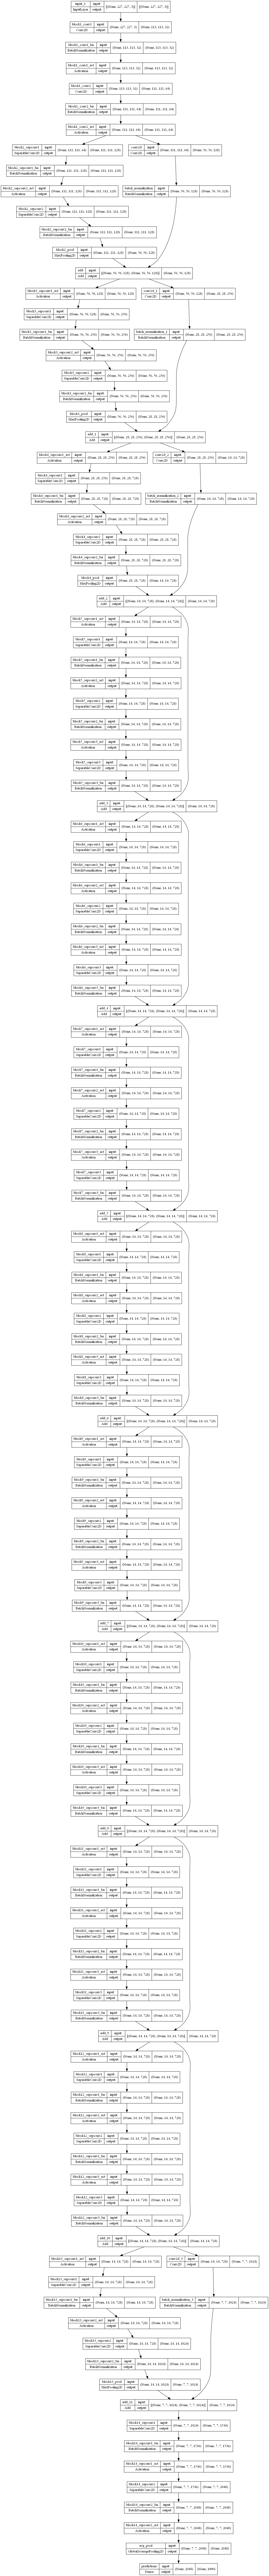

In [29]:
plot_model(xception, to_file='xception.png', show_shapes=True, show_layer_names=True)

In [30]:
xception.compile(optimizer = optimizer , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [31]:
history2 = xception.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),
                              epochs = epochs, validation_data = (x_test, y_test),
                              verbose = 2, steps_per_epoch = 100,
                              callbacks = [learning_rate_reduction])

<ipython-input-31-759a7b9b04b0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = xception.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),


Epoch 1/50
100/100 - 638s - loss: 1.3314 - accuracy: 0.5504 - val_loss: 1.7161 - val_accuracy: 0.5547 - lr: 0.0010 - 638s/epoch - 6s/step
Epoch 2/50
100/100 - 667s - loss: 0.7869 - accuracy: 0.6731 - val_loss: 3.4503 - val_accuracy: 0.2728 - lr: 0.0010 - 667s/epoch - 7s/step
Epoch 3/50
100/100 - 633s - loss: 0.6560 - accuracy: 0.7550 - val_loss: 1.7173 - val_accuracy: 0.5687 - lr: 0.0010 - 633s/epoch - 6s/step
Epoch 4/50
100/100 - 631s - loss: 0.5681 - accuracy: 0.7881 - val_loss: 10.3352 - val_accuracy: 0.2747 - lr: 0.0010 - 631s/epoch - 6s/step
Epoch 5/50
100/100 - 635s - loss: 0.4354 - accuracy: 0.8431 - val_loss: 0.9213 - val_accuracy: 0.7205 - lr: 0.0010 - 635s/epoch - 6s/step
Epoch 6/50
100/100 - 633s - loss: 0.3967 - accuracy: 0.8631 - val_loss: 1.0109 - val_accuracy: 0.7018 - lr: 0.0010 - 633s/epoch - 6s/step
Epoch 7/50
100/100 - 637s - loss: 0.3304 - accuracy: 0.8816 - val_loss: 0.3520 - val_accuracy: 0.8875 - lr: 0.0010 - 637s/epoch - 6s/step
Epoch 8/50
100/100 - 631s - loss:

In [32]:
xception.save("xceptionresult.h5")
print("Saved model to disk")

Saved model to disk


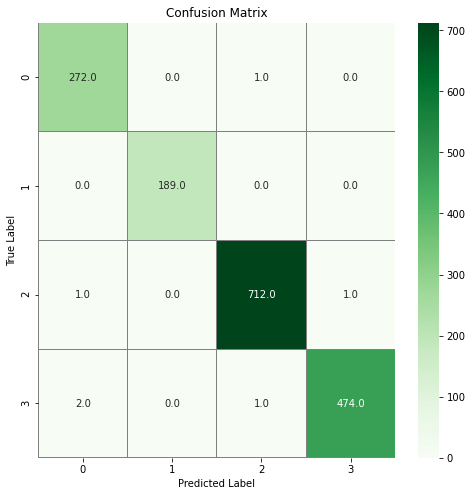

In [33]:
Y_pred = xception.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

confusion_mtx = confusion_matrix(y_test, Y_pred_classes)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt = '.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [34]:
from sklearn.metrics import classification_report

In [35]:
target_names = ['ASD', 'AVSD', 'NORMAL', 'VSD']
print(classification_report(y_test, Y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

         ASD       0.99      1.00      0.99       273
        AVSD       1.00      1.00      1.00       189
      NORMAL       1.00      1.00      1.00       714
         VSD       1.00      0.99      1.00       477

    accuracy                           1.00      1653
   macro avg       1.00      1.00      1.00      1653
weighted avg       1.00      1.00      1.00      1653



In [36]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in [0,1,2,3]:
    prec,recall,_,_ = precision_recall_fscore_support(np.array(y_test)==l,
                                                      np.array(Y_pred_classes)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])

In [37]:
pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

class  sensitivity  specificity
0      0     0.997826     0.996337
1      1     1.000000     1.000000
2      2     0.997870     0.997199
3      3     0.999150     0.993711

In [19]:
import sys
from tensorflow.keras.optimizers import SGD
from keras.layers import Input, merge, ZeroPadding2D
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Model
import keras.backend as K
sys.path.insert(0,'/home/xmli/livertumor_xmli/Keras-2.0.8')
sys.path.insert(0,'/home/xmli/livertumor_xmli/mylib')

from sklearn.metrics import log_loss

In [20]:
import tensorflow

In [21]:
def DenseNet121_Model():
  # load the DenseNet121 network, ensuring the head FC layer sets are left off
  baseModel = tensorflow.keras.applications.DenseNet121(weights="imagenet", include_top=False, input_tensor=tensorflow.keras.layers.Input(shape=(227, 227, 3)))
  # construct the head of the model that will be placed on top of the the base model
  output = baseModel.output
  output = tensorflow.keras.layers.AveragePooling2D(pool_size=(4, 4))(output)
  output = tensorflow.keras.layers.Flatten(name="flatten")(output)
  output = tensorflow.keras.layers.Dense(512, activation="relu")(output)
  output = tensorflow.keras.layers.Dropout(0.25)(output)
  output = tensorflow.keras.layers.Dense(4, activation="softmax")(output)
  # place the head FC model on top of the base model (this will become the actual model we will train)
  model = tensorflow.keras.Model(inputs=baseModel.input, outputs=output)
  # loop over all layers in the base model and freeze them so they will not be updated during the first training process
  for layer in baseModel.layers:
    layer.trainable = False
  return model

In [22]:
denseNet121 = DenseNet121_Model()

In [27]:
denseNet121.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 233, 233, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 114, 114, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 57, 57, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 57, 57, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 57, 57, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 conv3_block2_0_relu (Activatio  (None, 28, 28, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 28, 28, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 28, 28, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 28, 28, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization) 

 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 28, 28, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 28, 28, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 28, 28, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_blo

 conv4_block2_concat (Concatena  (None, 14, 14, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 14, 14, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 14, 14, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 14, 14, 128)  40960       ['conv4_block3_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 14, 14, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 14, 14, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block11_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 14, 14, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 14, 14, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 14, 14, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 14, 14, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 14, 14, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block16_1_conv[0][0]']   
 lization)

 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 14, 14, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 14, 14, 1024  4096        ['conv4_block24_concat[0][0]']   
                                )                                                                 
                                                                                                  
 pool4_relu (Activation)        (None, 14, 14, 1024  0           ['pool4_bn[0][0]']               
          

                                                                                                  
 conv5_block4_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block4_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block4_1_relu[0][0]']    
                                                                                                  
 conv5_block4_concat (Concatena  (None, 7, 7, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_block5_0_bn (BatchNormal  (None, 7, 7, 640)   2560        ['conv5_block4_concat[0][0]']    
 ization) 

 te)                                                              'conv5_block8_2_conv[0][0]']    
                                                                                                  
 conv5_block9_0_bn (BatchNormal  (None, 7, 7, 768)   3072        ['conv5_block8_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_0_relu (Activatio  (None, 7, 7, 768)   0           ['conv5_block9_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 7, 7, 128)    98304       ['conv5_block9_0_relu[0][0]']    
                                                                                                  
 conv5_blo

                                                                                                  
 conv5_block13_1_conv (Conv2D)  (None, 7, 7, 128)    114688      ['conv5_block13_0_relu[0][0]']   
                                                                                                  
 conv5_block13_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block13_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block13_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block13_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block13_1_relu[0][0]']   
          

                                                                                                  
 dense_1 (Dense)                (None, 4)            2052        ['dropout[0][0]']                
                                                                                                  
Total params: 7,564,356
Trainable params: 526,852
Non-trainable params: 7,037,504
__________________________________________________________________________________________________


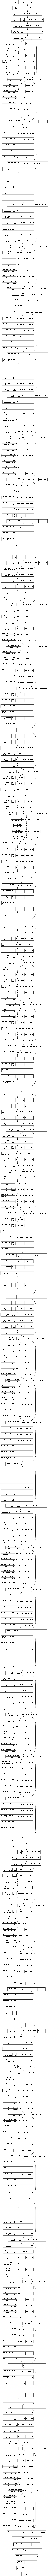

In [28]:
plot_model(denseNet121, to_file='densenet.png', show_shapes=True, show_layer_names=True)

In [34]:
epochs = 100
batch_size = 16

In [35]:
denseNet121.compile(optimizer = optimizer , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [36]:
history2 = denseNet121.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),
                              epochs = epochs, validation_data = (x_test, y_test),
                              verbose = 2, steps_per_epoch = 100,
                              callbacks = [learning_rate_reduction])

<ipython-input-36-0822b9d49feb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = denseNet121.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),


Epoch 1/100
100/100 - 207s - loss: 0.4888 - accuracy: 0.7937 - val_loss: 0.5642 - val_accuracy: 0.7713 - lr: 1.2500e-04 - 207s/epoch - 2s/step
Epoch 2/100
100/100 - 206s - loss: 0.4910 - accuracy: 0.8086 - val_loss: 0.5738 - val_accuracy: 0.7586 - lr: 1.2500e-04 - 206s/epoch - 2s/step
Epoch 3/100
100/100 - 205s - loss: 0.4978 - accuracy: 0.7922 - val_loss: 0.5526 - val_accuracy: 0.7689 - lr: 1.2500e-04 - 205s/epoch - 2s/step
Epoch 4/100
100/100 - 214s - loss: 0.5319 - accuracy: 0.7771 - val_loss: 0.5509 - val_accuracy: 0.7816 - lr: 1.2500e-04 - 214s/epoch - 2s/step
Epoch 5/100
100/100 - 204s - loss: 0.4886 - accuracy: 0.7997 - val_loss: 0.5629 - val_accuracy: 0.7713 - lr: 1.2500e-04 - 204s/epoch - 2s/step
Epoch 6/100
100/100 - 204s - loss: 0.5024 - accuracy: 0.7947 - val_loss: 0.5604 - val_accuracy: 0.7768 - lr: 1.2500e-04 - 204s/epoch - 2s/step
Epoch 7/100

Epoch 7: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
100/100 - 208s - loss: 0.4993 - accuracy: 0.8069 - val

Epoch 56/100
100/100 - 207s - loss: 0.4919 - accuracy: 0.7981 - val_loss: 0.5264 - val_accuracy: 0.7877 - lr: 1.0000e-05 - 207s/epoch - 2s/step
Epoch 57/100
100/100 - 207s - loss: 0.4702 - accuracy: 0.8044 - val_loss: 0.5219 - val_accuracy: 0.7889 - lr: 1.0000e-05 - 207s/epoch - 2s/step
Epoch 58/100
100/100 - 207s - loss: 0.4748 - accuracy: 0.8105 - val_loss: 0.5251 - val_accuracy: 0.7864 - lr: 1.0000e-05 - 207s/epoch - 2s/step
Epoch 59/100
100/100 - 208s - loss: 0.4557 - accuracy: 0.8231 - val_loss: 0.5311 - val_accuracy: 0.7834 - lr: 1.0000e-05 - 208s/epoch - 2s/step
Epoch 60/100
100/100 - 208s - loss: 0.4692 - accuracy: 0.8125 - val_loss: 0.5322 - val_accuracy: 0.7828 - lr: 1.0000e-05 - 208s/epoch - 2s/step
Epoch 61/100
100/100 - 214s - loss: 0.4864 - accuracy: 0.8119 - val_loss: 0.5315 - val_accuracy: 0.7828 - lr: 1.0000e-05 - 214s/epoch - 2s/step
Epoch 62/100
100/100 - 209s - loss: 0.4498 - accuracy: 0.8181 - val_loss: 0.5263 - val_accuracy: 0.7834 - lr: 1.0000e-05 - 209s/epoch - 

In [37]:
denseNet121.save("densenetnew.h5")
print("Saved model to disk")

Saved model to disk


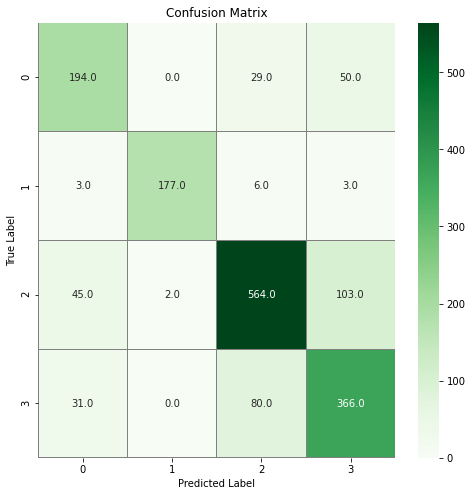

In [38]:
Y_pred = denseNet121.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

confusion_mtx = confusion_matrix(y_test, Y_pred_classes)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt = '.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [39]:
from sklearn.metrics import classification_report

In [40]:
target_names = ['ASD', 'AVSD', 'NORMAL', 'VSD']
print(classification_report(y_test, Y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

         ASD       0.71      0.71      0.71       273
        AVSD       0.99      0.94      0.96       189
      NORMAL       0.83      0.79      0.81       714
         VSD       0.70      0.77      0.73       477

    accuracy                           0.79      1653
   macro avg       0.81      0.80      0.80      1653
weighted avg       0.79      0.79      0.79      1653



In [41]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in [0,1,2,3]:
    prec,recall,_,_ = precision_recall_fscore_support(np.array(y_test)==l,
                                                      np.array(Y_pred_classes)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])

In [42]:
pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

class  sensitivity  specificity
0      0     0.942754     0.710623
1      1     0.998634     0.936508
2      2     0.877529     0.789916
3      3     0.867347     0.767296